In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data = {'Name':['Rob', 'Michael', 'Mohan', 'Ismail', 'Kory', "Gautam", "David", "Andrea", "Brad", 'Angelina','Donald',"Tom", "arnold", 'Jared', 'Stark', 'Ranbir', "Dipika", "Priyanka", "Nick", 'Alia', "Sid", 'Abdul'], 
        'Age':[27, 29, 29, 28, 42, 39, 41, 38, 36, 35, 37, 26,27, 28, 29, 32, 40, 41, 43, 39,41, 39],
       'Income($)':[70000, 90000, 61000, 60000, 150000, 155000, 160000, 162000, 156000, 130000, 137000, 45000, 48000, 51000, 49500, 53000, 65000, 63000, 64000, 80000, 82000, 58000]}

In [19]:
df= pd.DataFrame(data)

In [20]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


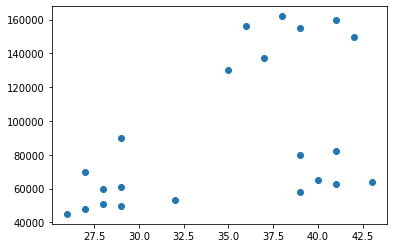

In [21]:
plt.scatter(df['Age'], df['Income($)'])

In [24]:
km = KMeans(n_clusters = 3)

In [32]:
scaler = MinMaxScaler()

In [44]:
scaler.fit(df[['Income($)', "Age"]])
df[['Income($)', "Age"]] = scaler.transform(df[['Income($)', 'Age']])

In [45]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [46]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])

In [47]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [48]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


No handles with labels found to put in legend.


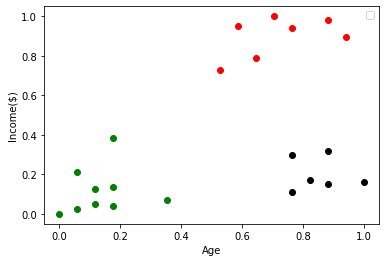

In [50]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

In [51]:
# for finding the best k value
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', "Income($)"]])
    sse.append(km.inertia_)

In [52]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.2105547899547249,
 0.17840674931327927,
 0.13265419827245162,
 0.10383752586603559]

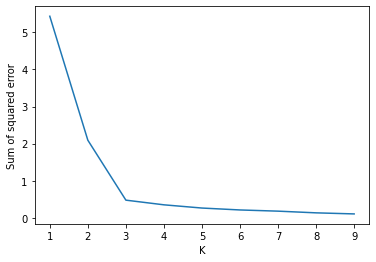

In [53]:
plt.clf()
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)